<a href="https://colab.research.google.com/github/Rojan116/MachineLearningProjects/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
train_df = pd.read_csv('data/train_set.csv',encoding='ISO-8859-1')
train_df = train_df[pd.notnull(train_df['label'])]  #not null label value
test_df = pd.read_csv('data/test_set.csv')
test_pred = test_df.text

In [299]:
print("test df head \n\n {}".format(test_df.head()))

test df head 

                                                 text
0  lv tmd pd trip unit for nh parts of circuit br...
1  module tm analog outputs analog output expansi...
2   command group t iii mechanismt p parts forcir...
3    parts of relayelectrical contact  issu e f xxup
4  parts for programmable logic controllers  dm  ...


In [300]:
print("train df tail \n\n {}".format(train_df.tail()))

train df tail 

           label                                               text
23610  84713010  veav hp ids dsc gb iu for ddr  g base nb pchp ...
23611  84713010   pgv inspiron  portable computernotebook assyb...
23612  84713010  xfuc acj eguuqnfinnnnnues india rmn hstnnic  n...
23613  84713010   nwg latitude  portable computernotebook assyb...
23614  84713010   rpp inspiron  portable computernotebook assyb...


In [301]:
print("Test df tail \n\n {}".format(test_df.tail()))

Test df tail 

                                                    text
5889   gdf latitude  portable computernotebookassyba...
5890   cfjx precision  portable computernotebook ass...
5891  eguujnnincnnnuas xuup acj note book computer l...
5892  egubjnninnnnums wwup note book computer laptop...
5893  lqav hp ids uma iu  g bnbpchp laptophstnnicbis...


In [0]:
classes = []
for x in train_df['label']:
  if x not in classes:
    classes.append(x)
    

In [303]:
print("classes => {}".format(classes))

classes => [85389000, 85177090, 85369090, 39269099, 73181500, 85366990, 85364900, 85238090, 87089900, 33041000, 87082900, 84713010]


In [304]:
train_df

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...
...,...,...
23610,84713010,veav hp ids dsc gb iu for ddr g base nb pchp ...
23611,84713010,pgv inspiron portable computernotebook assyb...
23612,84713010,xfuc acj eguuqnfinnnnnues india rmn hstnnic n...
23613,84713010,nwg latitude portable computernotebook assyb...


In [305]:
num_words = train_df['text'].apply(lambda x: len(x.split(' '))).sum()  #number of words
print(num_words)


230573


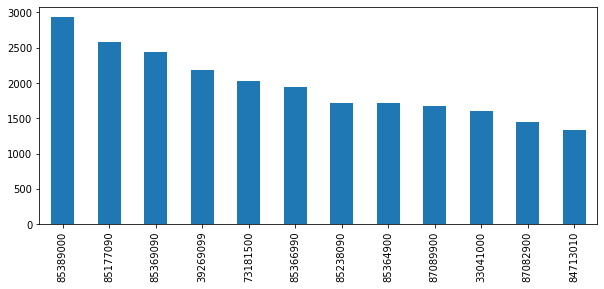

In [306]:
plt.figure(figsize=(10,4))
train_df.label.value_counts().plot(kind='bar');

In [0]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [0]:
X_train = train_df.text
y_train = train_df.label

In [309]:
X_train.values
# type(X_train)

array([' pdscpm gb part of panel of chiller',
       'nm  p economical extended rot hand parts for circuit breaker captive consumption',
       'lv ma pd trip unit for cvs parts of circuit breakers', ...,
       'xfuc acj eguuqnfinnnnnues india rmn hstnnic  notebook computer not sor sale',
       ' nwg latitude  portable computernotebook assybaseumaiu pgbisr laptopnot',
       ' rpp inspiron  portable computernotebook assybasekblmy pt bisr laptop'],
      dtype=object)

In [0]:

def print_plot(index):
    example = train_df[train_df.index == index][['text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])

In [0]:
X = train_df.text
y = train_df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [312]:
print("shape of x {}\n Shape of y {}".format(X.shape,y.shape))
print("shape of x_train {}\n Shape of y_train {}".format(X_train.shape,y_train.shape))

shape of x (23615,)
 Shape of y (23615,)
shape of x_train (16530,)
 Shape of y_train (16530,)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [314]:
nb = Pipeline([('vect',CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',MultinomialNB()),
               ])
nb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [315]:
classes_str = [str(item) for item in classes]
print(classes_str)

['85389000', '85177090', '85369090', '39269099', '73181500', '85366990', '85364900', '85238090', '87089900', '33041000', '87082900', '84713010']


In [316]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=classes_str))

accuracy 0.8932956951305575
              precision    recall  f1-score   support

    85389000       0.99      1.00      0.99       485
    85177090       0.86      0.78      0.82       675
    85369090       0.91      0.90      0.90       620
    39269099       1.00      0.98      0.99       375
    73181500       0.93      0.95      0.94       787
    85366990       0.99      0.98      0.99       483
    85364900       0.87      0.95      0.91       544
    85238090       0.88      0.84      0.86       595
    87089900       0.80      0.78      0.79       713
    33041000       0.83      0.90      0.86       854
    87082900       0.91      0.89      0.90       444
    84713010       0.86      0.85      0.85       510

    accuracy                           0.89      7085
   macro avg       0.90      0.90      0.90      7085
weighted avg       0.89      0.89      0.89      7085



In [317]:
diff_prediction = []
nb_prediction = nb.predict(test_pred)
diff_prediction.append(nb_prediction)
print(nb_prediction)

[85389000 85389000 85389000 ... 84713010 84713010 84713010]


In [318]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [319]:

%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=classes_str))

accuracy 0.8642201834862385
              precision    recall  f1-score   support

    85389000       0.98      1.00      0.99       485
    85177090       0.86      0.69      0.77       675
    85369090       0.89      0.90      0.90       620
    39269099       0.96      0.99      0.98       375
    73181500       0.88      0.96      0.92       787
    85366990       1.00      0.99      0.99       483
    85364900       0.83      0.97      0.89       544
    85238090       0.80      0.84      0.82       595
    87089900       0.80      0.68      0.74       713
    33041000       0.81      0.87      0.84       854
    87082900       0.91      0.76      0.83       444
    84713010       0.75      0.84      0.79       510

    accuracy                           0.86      7085
   macro avg       0.87      0.87      0.87      7085
weighted avg       0.87      0.86      0.86      7085

CPU times: user 143 ms, sys: 77.9 ms, total: 221 ms
Wall time: 127 ms


In [391]:
sgd_prediction= sgd.predict(test_pred)
diff_prediction.append(sgd_prediction)
print(sgd_prediction)

[85389000 85389000 85389000 ... 84713010 84713010 84713010]


In [320]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [321]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=classes_str))

accuracy 0.9315455187014821
              precision    recall  f1-score   support

    85389000       1.00      0.99      1.00       485
    85177090       0.86      0.87      0.87       675
    85369090       0.96      0.94      0.95       620
    39269099       0.99      0.99      0.99       375
    73181500       0.98      0.97      0.97       787
    85366990       1.00      0.99      0.99       483
    85364900       0.96      0.96      0.96       544
    85238090       0.88      0.91      0.89       595
    87089900       0.89      0.89      0.89       713
    33041000       0.90      0.91      0.90       854
    87082900       0.93      0.94      0.94       444
    84713010       0.91      0.88      0.90       510

    accuracy                           0.93      7085
   macro avg       0.94      0.94      0.94      7085
weighted avg       0.93      0.93      0.93      7085

CPU times: user 144 ms, sys: 88.8 ms, total: 232 ms
Wall time: 130 ms


In [392]:
logreg_prediction = logreg.predict(test_pred)
diff_prediction.append(logreg)
print(logreg_prediction)

[85389000 85389000 85389000 ... 84713010 84713010 84713010]


In [0]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [0]:
tokenize.fit_on_texts(X_train) # only fit on train
x_train = tokenize.texts_to_matrix(X_train)
x_test = tokenize.texts_to_matrix(X_test)
x_pred = tokenize.texts_to_matrix(test_pred)

In [0]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


In [327]:
num_classes = np.max(y_train) + 1
print("{}".format(num_classes))
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

12


In [328]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('x_pred shape:', x_pred.shape)

x_train shape: (16530, 1000)
x_test shape: (7085, 1000)
y_train shape: (16530, 12)
y_test shape: (7085, 12)
x_pred shape: (5894, 1000)


In [0]:
batch_size = 32
epochs = 10

In [0]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [331]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 12)                6156      
_________________________________________________________________
activation_12 (Activation)   (None, 12)                0         
Total params: 518,668
Trainable params: 518,668
Non-trainable params: 0
_________________________________________________________________


In [332]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 14877 samples, validate on 1653 samples
Epoch 1/10
14877/14877 [==============================] - 2s 155us/step - loss: 0.7862 - acc: 0.7788 - val_loss: 0.3854 - val_acc: 0.8820
Epoch 2/10
14877/14877 [==============================] - 2s 124us/step - loss: 0.3397 - acc: 0.8892 - val_loss: 0.3186 - val_acc: 0.8959
Epoch 3/10
14877/14877 [==============================] - 2s 131us/step - loss: 0.2713 - acc: 0.9101 - val_loss: 0.2935 - val_acc: 0.9080
Epoch 4/10
14877/14877 [==============================] - 2s 116us/step - loss: 0.2341 - acc: 0.9210 - val_loss: 0.2922 - val_acc: 0.9050
Epoch 5/10
14877/14877 [==============================] - 2s 119us/step - loss: 0.2057 - acc: 0.9285 - val_loss: 0.2819 - val_acc: 0.9080
Epoch 6/10
14877/14877 [==============================] - 2s 120us/step - loss: 0.1851 - acc: 0.9372 - val_loss: 0.2844 - val_acc: 0.9099
Epoch 7/10
14877/14877 [==============================] - 2s 123us/step - loss: 0.1700 - acc: 0.9402 - val_loss: 0.2837 - v

In [333]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

7085/7085 [==============================] - 0s 42us/step
Test accuracy: 0.9052928722737621


In [334]:
NN_prediction = model.predict_classes(x_pred)
diff_prediction.append(NN_prediction)
print(NN_prediction)

[9 9 9 ... 3 3 3]


In [0]:
scored_res =  {'Text': test_pred,
               'MultinomialNB': nb_prediction,
              'sgd': sgd_prediction,
               'logreg': logreg_prediction,
        'NN': NN_prediction
        }

In [0]:
df = pd.DataFrame(scored_res, columns= ['Text','MultinomialNB','sgd','logreg','NN'])

In [415]:
df.head()


,Text,MultinomialNB,sgd,logreg,NN
0,lv tmd pd trip unit for nh parts of circuit br...,85389000,85389000,85389000,9
1,module tm analog outputs analog output expansi...,85389000,85389000,85389000,9
2,command group t iii mechanismt p parts forcir...,85389000,85389000,85389000,9
3,parts of relayelectrical contact issu e f xxup,85389000,85389000,85389000,9
4,parts for programmable logic controllers dm ...,85389000,85389000,85389000,9


In [420]:
ls


data/  sample_data/


In [0]:
export_csv = df.to_csv("data/prediction_result.csv", index = None, header=True)

In [0]:
from google.colab import files
files.download('data/prediction_result.csv') 